# **4장. 인공 신경망 모델 — 이미지 분류**

## **4-3절. 합성곱 인공 신경망 모델 만들기**

- 런타임 환경이 GPU로 설정되지 않으면 시간이 많이 걸릴수 있습니다.

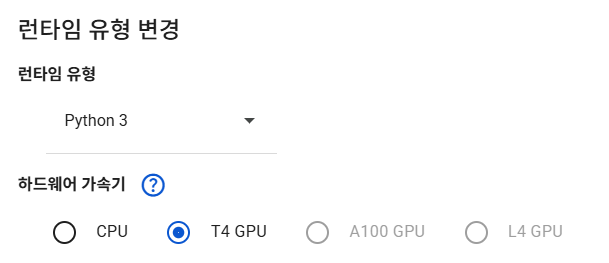

## 합성곱(convolution)이란

📌[실습 04-21] 라이브러리 불러오기

In [ ]:
!pip install koreanize_matplotlib # 한글 폰트 설치
import koreanize_matplotlib

from tensorflow.keras.datasets import cifar10
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt
import tensorflow as tf; from tensorflow import keras
from keras.models import Sequential; from keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization; import random
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score; import seaborn as sns
import warnings; warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 27.1 MB/s eta 0:00:00


📌[실습 04-22] 합성곱 연산 수행하기

In [ ]:
# 원본 이미지(4x4)
image=np.array([
    [0, 1, 1, 0],
    [2, 0, 2, 1],
    [3, 3, 0, 0],
    [0, 4, 0, 4] ])

# 필터(3x3)
filter=np.array([
    [0,   0,  0],
    [1,   1,  1],
    [-1, -1, -1] ])

output=np.zeros((2,2))

# 합성곱 연산
for i in range(2):      # 세로 이동
    for j in range(2):  # 가로 이동
        sub = image[i:i+filter.shape[0], j:j+filter.shape[1]]
        value = np.sum(sub * filter)  # 원소별 곱 후 합
        output[i, j] = value

print("원본 이미지:"); print(image)
print("필터:"); print(filter)
print("합성곱 결과:"); print(output)

원본 이미지:
[[0 1 1 0]
 [2 0 2 1]
 [3 3 0 0]
 [0 4 0 4]]
필터:
[[ 0  0  0]
 [ 1  1  1]
 [-1 -1 -1]]
합성곱 결과:
[[-2.  0.]
 [ 2. -5.]]


📌[실습 04-23] 패딩을 사용한 합성곱 연산 수행하기

In [ ]:
# 원본 이미지(4x4)
image=np.array([
    [0, 1, 1, 0],
    [2, 0, 2, 1],
    [3, 3, 0, 0],
    [0, 4, 0, 4] ])

# 패딩 이미지(6x6): 원본 이미지 어레아의 상하 좌우에 0을 채워 넣음
image_pad=np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 0],
    [0, 2, 0, 2, 1, 0],
    [0, 3, 3, 0, 0, 0],
    [0, 0, 4, 0, 4, 0],
    [0, 0, 0, 0, 0, 0] ])

# 필터(3x3)
filter=np.array([
    [0,   0,  0],
    [1,   1,  1],
    [-1, -1, -1] ])

output = np.zeros((4,4)) # 원본 이미지와 동일한 차원
# 패딩 이미지의 합성곱 연산
for i in range(4):      # 세로 이동
    for j in range(4):  # 가로 이동
        sub = image_pad[i:i+filter.shape[0], j:j+filter.shape[1]]
        value = np.sum(sub * filter)  # 원소별 곱 후 합
        output[i, j] = value

print("원본 이미지:"); print(image)
print("패딩된 이미지:"); print(image_pad)
print("필터:"); print(filter)
print("합성곱 결과:"); print(output)

원본 이미지:
[[0 1 1 0]
 [2 0 2 1]
 [3 3 0 0]
 [0 4 0 4]]
패딩된 이미지:
[[0 0 0 0 0 0]
 [0 0 1 1 0 0]
 [0 2 0 2 1 0]
 [0 3 3 0 0 0]
 [0 0 4 0 4 0]
 [0 0 0 0 0 0]]
필터:
[[ 0  0  0]
 [ 1  1  1]
 [-1 -1 -1]]
합성곱 결과:
[[-1. -2. -1. -2.]
 [-4. -2.  0.  3.]
 [ 2.  2. -5. -4.]
 [ 4.  4.  8.  4.]]


📌[실습 04-24] 합성곱 결과 시각화하기

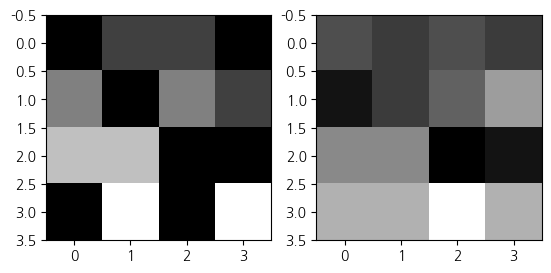

In [ ]:
plt.subplot(1,2,1); plt.imshow(image, cmap="gray")
plt.subplot(1,2,2); plt.imshow(output, cmap="gray")


📌[실습 04-25] 실제 이미지에 합성곱 연산 적용하기

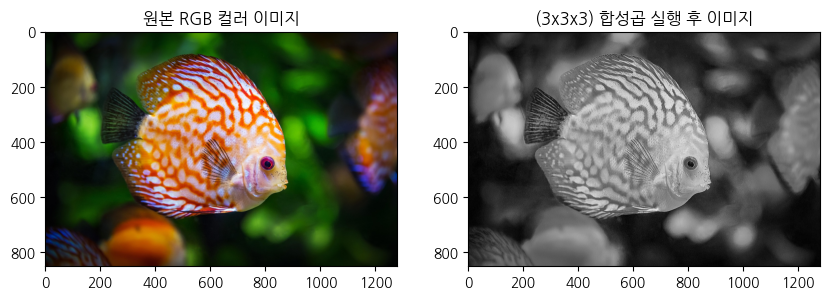

In [ ]:
# 라이브러리 불러오기
import cv2; import numpy as np; import matplotlib.pyplot as plt; from PIL import Image
image = Image.open("샘플이미지.jpg") # 이미지 불러오기
image_array = np.array(image) # NumPy 배열로 변환
# 채널별 필터 정의
filter_R=np.array([ [-1, 1, -1], [-1, 9, -1], [-1 ,1, -1] ], dtype=np.float32)
filter_G=np.array([ [-1, 1, -1], [-1, 5, -1], [-1 ,1, -1] ], dtype=np.float32)
filter_B=np.array([ [-1, 1, -1], [-1, 2, -1], [-1 ,1, -1] ], dtype=np.float32)

# 채널별 합성곱 적용
output_R=cv2.filter2D(image_array[:, :, 0], -1, filter_R)
output_G=cv2.filter2D(image_array[:, :, 1], -1, filter_G)
output_B=cv2.filter2D(image_array[:, :, 2], -1, filter_B)
# 합성곱 결과를 흑백이미지로 변환해서 결합
output_gray=0.299*output_R + 0.587*output_G + 0.114*output_B
combined=np.clip(output_gray, 0, 255).astype(np.uint8)
# 이미지로 출력
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1); plt.title("원본 RGB 컬러 이미지"); plt.imshow(image_array.astype(np.uint8))
plt.subplot(1, 2, 2); plt.title("(3x3x3) 합성곱 실행 후 이미지"); plt.imshow(combined, cmap="gray")
plt.show()

### 실습 데이터 불러오기(cifar10)


📌[실습 04-26] 데이터셋 불러오기

In [ ]:
# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 데이터 크기 확인
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


📌[실습 04-27] 처음 10개 이미지와 라벨  출력하기

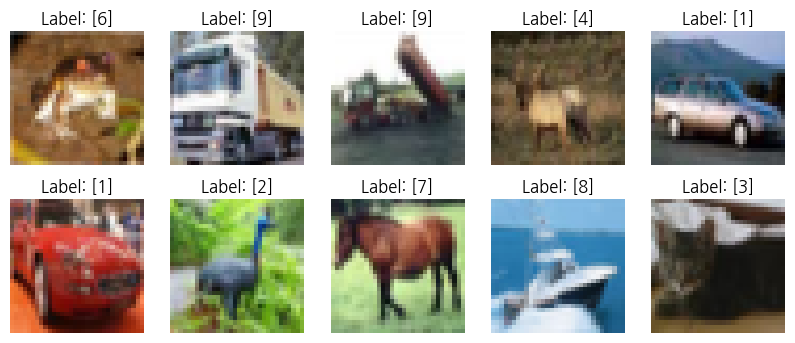

In [ ]:
plt.figure(figsize=(10, 4))  # 그림 크기 지정

for i in range(10):
    plt.subplot(2, 5, i+1)  # 2행 5열의 서브플롯
    plt.imshow(x_train[i])
    plt.axis("off")  # 축 숨기기
    plt.title(f"Label: {y_train[i]}")
plt.show()


📌[실습 04-28] 스케일 정규화하고 클래스 라벨 정의하기

In [ ]:
x_train=x_train/255; x_test=x_test/255 # 스케일 정규화

class_labels=['air','auto','bird','cat','deer','dog','frog','horse','ship','truck']
class_labels[5]

'dog'

📌[실습 04-29] CNN 기반 이미지 분류 모델 설정하기

In [ ]:
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt
import tensorflow as tf; from tensorflow import keras
from keras.models import Sequential; from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization; import random

SEED = 42; np.random.seed(SEED); random.seed(SEED); tf.random.set_seed(SEED) #랜덤 시드 고정하기

# 모델 설정하기
CIFAR = Sequential()

# 합성곱 + 풀링 반복
CIFAR.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
CIFAR.add(MaxPooling2D((2,2)))

CIFAR.add(Conv2D(64, (3,3), padding='same', activation='relu'))
CIFAR.add(MaxPooling2D((2,2)))

CIFAR.add(Dropout(0.5))      # 신경망 뉴런 일부를 랜덤 제거 (과대적합 방지)

CIFAR.add(Conv2D(32, (3,3), padding='same', activation='relu'))
CIFAR.add(MaxPooling2D((2,2)))

CIFAR.add(Conv2D(32, (3,3), padding='same', activation='relu'))
CIFAR.add(MaxPooling2D((2,2)))

CIFAR.add(Flatten())
CIFAR.add(Dense(16, activation="relu") )
CIFAR.add(Dropout(0.5))
CIFAR.add(Dense(10, activation="softmax")) # 분류는 softmax 사용
CIFAR.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 4, 4, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,666 (268.23 KB)

 Trainable params: 68,666 (268.23 KB)

 Non-trainable params: 0 (0.00 B)

📌[실습 04-31] CNN 기반 이미지 분류 모델 학습하기

In [ ]:
# 조기 종료 기능 설정
early_stopping=EarlyStopping(
    monitor="val_loss",            # 검증 손실을 기준으로 모니터링
    patience=10,                   # 10번 연속 개선되지 않으면 학습 중단
    restore_best_weights=True )    # 가장 성능이 좋은 시점의 가중치로 복원
# 컴파일
CIFAR.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# 학습
history=CIFAR.fit(x_train, y_train,  epochs=100, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stopping])


Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.1719 - loss: 2.1713 - val_accuracy: 0.3377 - val_loss: 1.7811
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2927 - loss: 1.8241 - val_accuracy: 0.4071 - val_loss: 1.6196
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3317 - loss: 1.7222 - val_accuracy: 0.4706 - val_loss: 1.4928
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3644 - loss: 1.6549 - val_accuracy: 0.5089 - val_loss: 1.3726
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3879 - loss: 1.5974 - val_accuracy: 0.5235 - val_loss: 1.3300
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4143 - loss: 1.5472 - val_accuracy: 0.5433 - val_loss: 1.2739
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4235 - loss: 1.5100 - val_accuracy: 0.5759 - val_loss: 1.2104
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4344 - loss: 1.4841 - val_ac

📌학습 과정의 예측 정확도 변화 시각화하기

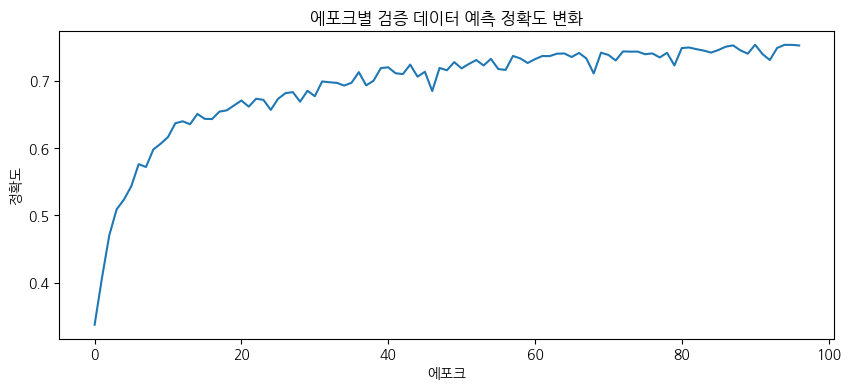

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(history.history["val_accuracy"])
plt.title("에포크별 검증 데이터 예측 정확도 변화")
plt.xlabel("에포크"); plt.ylabel("정확도");

📌[실습 04-32] 학습된 모델로 클래스별 예측 확률 구하기

In [ ]:
y_prob=CIFAR.predict(x_test, verbose=0)  # 클래스별 확률 예측
y_pred_idx=np.argmax(y_prob, axis=1)  # max 확률 인덱스
print("예측 확률")
print(y_prob[0]); print()
print("예측 라벨")
print([class_labels[i] for i in  y_pred_idx[:10]]) # 리스트 내포 반복문

예측 확률
[0.00221839 0.00431645 0.03910476 0.49453306 0.01011887 0.40452844
 0.03036535 0.01140548 0.00125333 0.00215595]

예측 라벨
['cat', 'ship', 'ship', 'ship', 'frog', 'frog', 'auto', 'frog', 'cat', 'truck']


📌학습된 모형의 예측 정확도 시각화하기

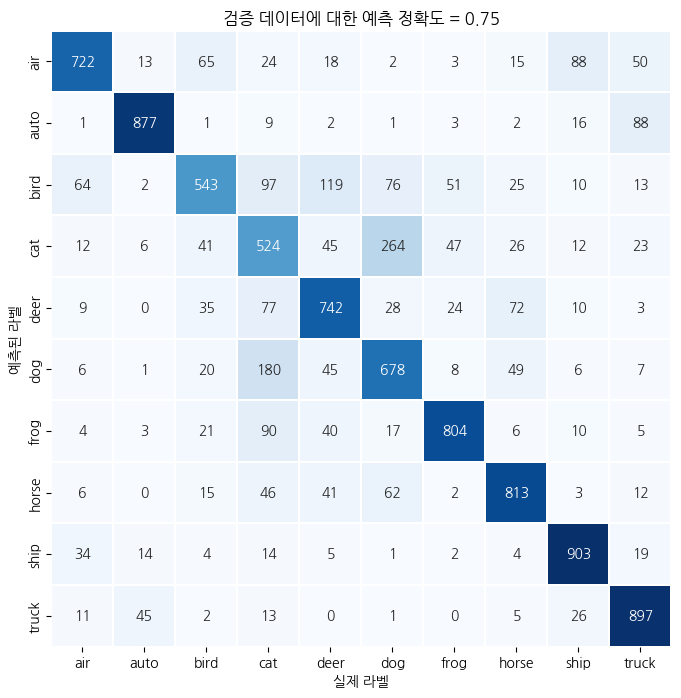

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

y_test_idex=np.argmax(y_test, axis=1)  # 비교를 위해 y_test도 인덱스로 변경

# 검증용 데이터셋에 대한 혼동행렬 생성
cm=confusion_matrix(y_test, y_pred_idx)
# 분류 정확도 계산
acc=accuracy_score(y_test, y_pred_idx)

# 혼동행렬 시각화 (이전 코드 재활용)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True,fmt="d", linewidths=0.1, cmap='Blues',cbar=None,
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('실제 라벨'); plt.ylabel('예측된 라벨')
plt.title(f"검증 데이터에 대한 예측 정확도 = {acc:.2f}")
plt.show()

### 모델을 사용하여 테스트 이미지 분류하기

📌[실습 04-33] 검증 이미지를 입력하여 예측 결과 확인하기

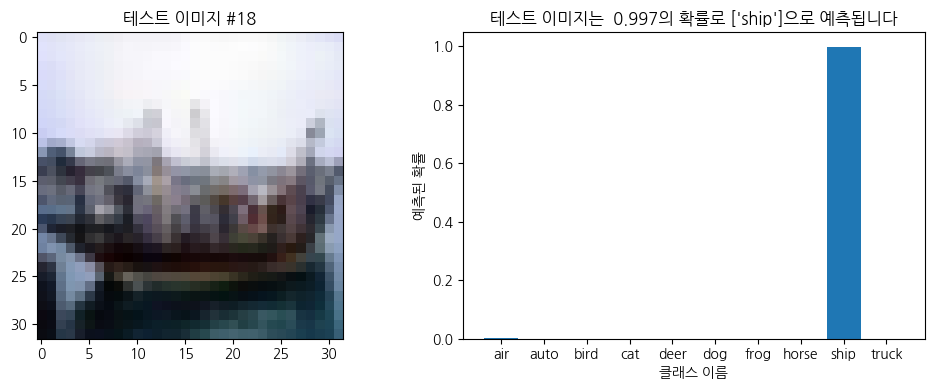

In [ ]:
#테스트 이미지 분류 - 1

plt.figure(figsize=(10, 4)) # 그림 크기
k=18    # 예측 이미지 선택

# 첫 번째 서브플롯: 이미지
plt.subplot(1, 2, 1)
plt.imshow(x_test[k])
plt.title(f"테스트 이미지 #{k}")

prob=CIFAR.predict(x_test, verbose=0)[k]  # 예측된 확률 벡터
pred_index=np.argmax(prob)  # 예측된 레이블(가장 높은 확률을 가진 클래스)
max_prob=np.max(prob)

# 두 번째 서브플롯: 예측 확률
plt.subplot(1, 2, 2)
plt.bar(class_labels, prob)
plt.xticks(np.arange(10))
plt.xlabel("클래스 이름")
plt.ylabel("예측된 확률")
plt.title(f"테스트 이미지는 {max_prob: .3f}의 확률로 {[class_labels[pred_index]]}으로 예측됩니다")
plt.tight_layout()
plt.show()


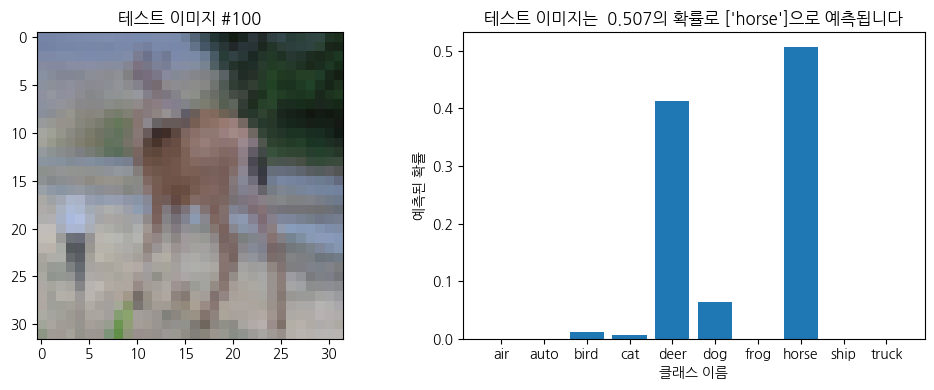

In [ ]:
#테스트 이미지 분류 - 2

plt.figure(figsize=(10, 4)) # 그림 크기
k=100    # 예측 이미지 선택

# 첫 번째 서브플롯: 이미지
plt.subplot(1, 2, 1)
plt.imshow(x_test[k])
plt.title(f"테스트 이미지 #{k}")

prob=CIFAR.predict(x_test, verbose=0)[k]  # 예측된 확률 벡터
pred_index=np.argmax(prob)  # 예측된 레이블(가장 높은 확률을 가진 클래스)
max_prob=np.max(prob)

# 두 번째 서브플롯: 예측 확률
plt.subplot(1, 2, 2)
plt.bar(class_labels, prob)
plt.xticks(np.arange(10))
plt.xlabel("클래스 이름")
plt.ylabel("예측된 확률")
plt.title(f"테스트 이미지는 {max_prob: .3f}의 확률로 {[class_labels[pred_index]]}으로 예측됩니다")
plt.tight_layout()
plt.show()